In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score, roc_auc_score 
# 데이터 로드
Time = pd.read_csv('data/Time.csv')
TimeProvince = pd.read_csv('data/TimeProvince.csv')
TimeProvince1 = pd.read_csv('data/TimeProvince1.csv')
Region = pd.read_csv('data/Region.csv')
Time = Time.drop(['time','negative','confirmed','released','deceased',], axis=1)
Time

,date,test,indi_test,indi_confirmed
0,2020-01-20,1,1,1
1,2020-01-21,1,0,0
2,2020-01-22,4,3,0
3,2020-01-23,22,18,0
4,2020-01-24,27,5,1
...,...,...,...,...
128,2020-05-27,852876,13401,40
129,2020-05-28,868666,15790,79
130,2020-05-29,885120,16454,58
131,2020-05-30,902901,17781,39


In [2]:
TimeProvince1

,date,time,province,confirmed,released,deceased,Tconfirmed
0,2020-01-31,16,Seoul,4,0,0,4
1,2020-01-31,16,Busan,0,0,0,0
2,2020-01-31,16,Daegu,0,0,0,0
3,2020-01-31,16,Incheon,1,0,0,1
4,2020-01-31,16,Gwangju,0,0,0,0
...,...,...,...,...,...,...,...
80,2020-05-31,0,Jeollabuk-do,3,19,0,21
81,2020-05-31,0,Jeollanam-do,4,17,0,19
82,2020-05-31,0,Gyeongsangbuk-do,14,1295,2,1379
83,2020-05-31,0,Gyeongsangnam-do,6,121,0,123


In [3]:
TP_confirmed = TimeProvince1
TP_confirmed = TP_confirmed.drop(['time','released'], axis=1)

In [4]:
TP_confirmed['month']=TP_confirmed['date'].str[6:7]

In [5]:
TP_confirmed

,date,province,confirmed,deceased,Tconfirmed,month
0,2020-01-31,Seoul,4,0,4,1
1,2020-01-31,Busan,0,0,0,1
2,2020-01-31,Daegu,0,0,0,1
3,2020-01-31,Incheon,1,0,1,1
4,2020-01-31,Gwangju,0,0,0,1
...,...,...,...,...,...,...
80,2020-05-31,Jeollabuk-do,3,0,21,5
81,2020-05-31,Jeollanam-do,4,0,19,5
82,2020-05-31,Gyeongsangbuk-do,14,2,1379,5
83,2020-05-31,Gyeongsangnam-do,6,0,123,5


In [6]:
TP_df = TP_confirmed.pivot('province','month','confirmed')
TP_df

month,1,2,3,4,5
province,,,,,
Busan,0,80,39,18,10
Chungcheongbuk-do,0,10,34,1,15
Chungcheongnam-do,0,55,73,15,3
Daegu,0,2236,4448,168,31
Daejeon,0,13,23,4,6
Gangwon-do,0,7,29,17,4
Gwangju,0,9,11,10,2
Gyeonggi-do,5,77,394,200,164
Gyeongsangbuk-do,0,488,812,65,14


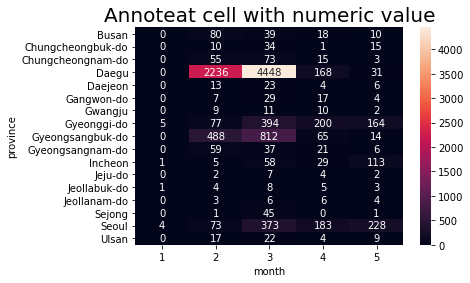

In [7]:
sns.heatmap(TP_df, annot=True, fmt='d')
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

In [8]:
TP_deceased = TimeProvince1.drop(['time','released'], axis=1)

In [9]:
TP_deceased

,date,province,confirmed,deceased,Tconfirmed
0,2020-01-31,Seoul,4,0,4
1,2020-01-31,Busan,0,0,0
2,2020-01-31,Daegu,0,0,0
3,2020-01-31,Incheon,1,0,1
4,2020-01-31,Gwangju,0,0,0
...,...,...,...,...,...
80,2020-05-31,Jeollabuk-do,3,0,21
81,2020-05-31,Jeollanam-do,4,0,19
82,2020-05-31,Gyeongsangbuk-do,14,2,1379
83,2020-05-31,Gyeongsangnam-do,6,0,123


In [10]:
TP_deceased['month']=TP_deceased['date'].str[6:7]

In [11]:
TP_df = TP_deceased.pivot('province','month','deceased')

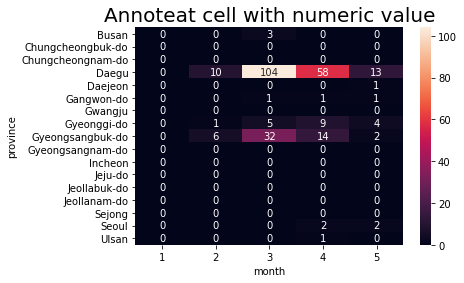

In [12]:
sns.heatmap(TP_df, annot=True, fmt='d')
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

In [13]:
TP_confirmed = TP_confirmed.drop(['date','Tconfirmed','month'], axis=1)
TP_confirmed

,province,confirmed,deceased
0,Seoul,4,0
1,Busan,0,0
2,Daegu,0,0
3,Incheon,1,0
4,Gwangju,0,0
...,...,...,...
80,Jeollabuk-do,3,0
81,Jeollanam-do,4,0
82,Gyeongsangbuk-do,14,2
83,Gyeongsangnam-do,6,0


In [14]:
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])],remainder='passthrough')
df=transformer.fit_transform(TP_confirmed[:]).toarray()
df

array([[ 0.,  0.,  0., ...,  0.,  4.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., 14.,  2.],
       [ 0.,  0.,  0., ...,  0.,  6.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.]])

In [15]:
min_max_scaler=preprocessing.MinMaxScaler()
scaler=min_max_scaler.fit_transform(df[:, :17])
arr=np.c_[scaler, df[:,17]]

In [16]:
cols=['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do', 'Jeollanam-do','Seoul','Ulsan', 'confirmed', 'deceased']
df2=pd.DataFrame(
    data=arr[:, :],
    index=[i for i in range(arr.shape[0])],
    columns=[i for i in cols]
)
df2

,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Seoul,Ulsan,confirmed,deceased
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [17]:
X = df2[cols].drop('deceased', axis=1)
Y = df2.deceased
X

,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Seoul,Ulsan,confirmed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

x_train, x_test, y_train, y_test = train_test_split(X, Y)
dtrain=xgb.DMatrix(data=x_train, label=y_train)
dtest=xgb.DMatrix(data=x_test, label=y_test)

params={
    'max_depth':3,
    'eta':0.005,
    'early_stoppings':1000,
    'base_score':0.5,
}

evals=[(dtrain, 'train'), (dtest, 'eval')]
xgb_model=xgb.train(params, dtrain=dtrain, num_boost_round=1000, evals=evals)
pred_probs=xgb_model.predict(dtest)

def predict(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='micro')
    recall=recall_score(y_test,pred,average='micro')
    f1=f1_score(y_test,pred,average='micro')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:.3f}, 재현율:{2:.3f}, f1:{3:.3f}'.format(accuracy,precision,recall,f1))

pred=[1 if x > 0.5 else 0 for x in pred_probs]
predict(y_test,pred)

[09:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:318.41080	eval-rmse:948.03687
[1]	train-rmse:317.89038	eval-rmse:947.38220
[2]	train-rmse:317.37295	eval-rmse:946.73053
[3]	train-rmse:316.85867	eval-rmse:946.08234
[4]	train-rmse:316.34738	eval-rmse:945.43726
[5]	train-rmse:315.83917	eval-rmse:944.79553
[6]	train-rmse:315.33395	eval-rmse:944.15656
[7]	train-rmse:314.83176	eval-rmse:943.52106
[8]	train-rmse:314.33252	eval-rmse:942.88867
[9]	train-rmse:313.83624	eval-rmse:942.25940
[10]	train-rmse:313.34299	eval-rmse:941.63330
[11]	train-rmse:312.85266	eval-rmse:941.01025
[12]	train-rmse:312.36527	eval-rmse:940.39032
[13]	train-rmse:311

[169]	train-rmse:263.55652	eval-rmse:872.47174
[170]	train-rmse:263.37588	eval-rmse:872.18329
[171]	train-rmse:263.19647	eval-rmse:871.89270
[172]	train-rmse:263.01816	eval-rmse:871.60687
[173]	train-rmse:262.84106	eval-rmse:871.31903
[174]	train-rmse:262.66507	eval-rmse:871.03589
[175]	train-rmse:262.49030	eval-rmse:870.75415
[176]	train-rmse:262.31659	eval-rmse:870.47034
[177]	train-rmse:262.14410	eval-rmse:870.19110
[178]	train-rmse:261.97269	eval-rmse:869.90973
[179]	train-rmse:261.80243	eval-rmse:869.63330
[180]	train-rmse:261.63324	eval-rmse:869.35449
[181]	train-rmse:261.46515	eval-rmse:869.08069
[182]	train-rmse:261.29819	eval-rmse:868.80444
[183]	train-rmse:261.13236	eval-rmse:868.53314
[184]	train-rmse:260.96756	eval-rmse:868.25946
[185]	train-rmse:260.80386	eval-rmse:867.99072
[186]	train-rmse:260.64123	eval-rmse:867.71948
[187]	train-rmse:260.47971	eval-rmse:867.45331
[188]	train-rmse:260.31921	eval-rmse:867.18457
[189]	train-rmse:260.15973	eval-rmse:866.92078
[190]	train-r

[344]	train-rmse:244.79723	eval-rmse:837.51587
[345]	train-rmse:244.74104	eval-rmse:837.38238
[346]	train-rmse:244.68518	eval-rmse:837.25440
[347]	train-rmse:244.62973	eval-rmse:837.12195
[348]	train-rmse:244.57461	eval-rmse:836.99518
[349]	train-rmse:244.51991	eval-rmse:836.86389
[350]	train-rmse:244.46555	eval-rmse:836.73810
[351]	train-rmse:244.41157	eval-rmse:836.60797
[352]	train-rmse:244.35790	eval-rmse:836.48352
[353]	train-rmse:244.30464	eval-rmse:836.35944
[354]	train-rmse:244.25171	eval-rmse:836.23096
[355]	train-rmse:244.19914	eval-rmse:836.10803
[356]	train-rmse:244.14693	eval-rmse:835.98065
[357]	train-rmse:244.09505	eval-rmse:835.85889
[358]	train-rmse:244.04350	eval-rmse:835.73261
[359]	train-rmse:243.99232	eval-rmse:835.61182
[360]	train-rmse:243.94151	eval-rmse:835.48669
[361]	train-rmse:243.89101	eval-rmse:835.36707
[362]	train-rmse:243.84082	eval-rmse:835.24292
[363]	train-rmse:243.79100	eval-rmse:835.12439
[364]	train-rmse:243.74152	eval-rmse:835.00128
[365]	train-r

[519]	train-rmse:238.90840	eval-rmse:821.08588
[520]	train-rmse:238.89023	eval-rmse:821.02777
[521]	train-rmse:238.87219	eval-rmse:820.96539
[522]	train-rmse:238.85426	eval-rmse:820.89734
[523]	train-rmse:238.83640	eval-rmse:820.84003
[524]	train-rmse:238.81869	eval-rmse:820.77838
[525]	train-rmse:238.80110	eval-rmse:820.72162
[526]	train-rmse:238.78361	eval-rmse:820.65466
[527]	train-rmse:238.76623	eval-rmse:820.59839
[528]	train-rmse:238.74896	eval-rmse:820.53778
[529]	train-rmse:238.73183	eval-rmse:820.47168
[530]	train-rmse:238.71477	eval-rmse:820.41632
[531]	train-rmse:238.69781	eval-rmse:820.35638
[532]	train-rmse:238.68100	eval-rmse:820.29108
[533]	train-rmse:238.66425	eval-rmse:820.23633
[534]	train-rmse:238.64763	eval-rmse:820.17725
[535]	train-rmse:238.63110	eval-rmse:820.11273
[536]	train-rmse:238.61469	eval-rmse:820.05878
[537]	train-rmse:238.59839	eval-rmse:820.00037
[538]	train-rmse:238.58217	eval-rmse:819.93677
[539]	train-rmse:238.56606	eval-rmse:819.88348
[540]	train-r

[694]	train-rmse:236.97104	eval-rmse:813.35193
[695]	train-rmse:236.96492	eval-rmse:813.31830
[696]	train-rmse:236.95883	eval-rmse:813.29236
[697]	train-rmse:236.95276	eval-rmse:813.26282
[698]	train-rmse:236.94676	eval-rmse:813.22961
[699]	train-rmse:236.94076	eval-rmse:813.20398
[700]	train-rmse:236.93481	eval-rmse:813.17493
[701]	train-rmse:236.92892	eval-rmse:813.14960
[702]	train-rmse:236.92303	eval-rmse:813.11682
[703]	train-rmse:236.91721	eval-rmse:813.09161
[704]	train-rmse:236.91141	eval-rmse:813.06299
[705]	train-rmse:236.90562	eval-rmse:813.03076
[706]	train-rmse:236.89992	eval-rmse:813.00598
[707]	train-rmse:236.89418	eval-rmse:812.97760
[708]	train-rmse:236.88855	eval-rmse:812.94586
[709]	train-rmse:236.88290	eval-rmse:812.92133
[710]	train-rmse:236.87730	eval-rmse:812.89337
[711]	train-rmse:236.87175	eval-rmse:812.86188
[712]	train-rmse:236.86621	eval-rmse:812.83771
[713]	train-rmse:236.86073	eval-rmse:812.81024
[714]	train-rmse:236.85527	eval-rmse:812.77918
[715]	train-r

[869]	train-rmse:236.29494	eval-rmse:809.82989
[870]	train-rmse:236.29254	eval-rmse:809.81250
[871]	train-rmse:236.29016	eval-rmse:809.82153
[872]	train-rmse:236.28778	eval-rmse:809.80695
[873]	train-rmse:236.28542	eval-rmse:809.81079
[874]	train-rmse:236.28307	eval-rmse:809.79626
[875]	train-rmse:236.28072	eval-rmse:809.77918
[876]	train-rmse:236.27838	eval-rmse:809.78815
[877]	train-rmse:236.27609	eval-rmse:809.77368
[878]	train-rmse:236.27376	eval-rmse:809.77753
[879]	train-rmse:236.27145	eval-rmse:809.76337
[880]	train-rmse:236.26916	eval-rmse:809.74628
[881]	train-rmse:236.26688	eval-rmse:809.75507
[882]	train-rmse:236.26460	eval-rmse:809.74085
[883]	train-rmse:236.26233	eval-rmse:809.74457
[884]	train-rmse:236.26007	eval-rmse:809.73053
[885]	train-rmse:236.25784	eval-rmse:809.71381
[886]	train-rmse:236.25562	eval-rmse:809.72266
[887]	train-rmse:236.25339	eval-rmse:809.70844
[888]	train-rmse:236.25116	eval-rmse:809.71228
[889]	train-rmse:236.24896	eval-rmse:809.69824
[890]	train-r